
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 5 - RL <br>
<font color=696880 size=4>
Amirmahdi Meighani


____

# Personal Data

In [1]:
# Set your student number and name
student_number = 401106617
Name = 'Alireza'
Last_Name = 'Mirrokni'

# Rules

<font color=red>
Please run all the cells.
</font>

# Q1: Mountain Car (100 Points)

In this notebook we have a game called mountain car. the car is in a valley and at evey moment we can model its state using two floats as speed and location along x axis. You can control the car using three actions.

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

the goal is to reach the peak of mountain in the minimum number of frames. because you get -1 reward for evey timestamp.

you should model the countious enviroment with a approximate descrete one and train your agent using Q learning and SARSA algorithms.


install required libraries

In [2]:
!pip install numpy
!pip install matplotlib
!pip install gymnasium

## imports

In [141]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import warnings
warnings.filterwarnings("ignore")

In [4]:
def visualize(env):
    '''
    use this function to see the state of the game in the current moment
    '''
    env_screen = env.render()
    plt.imshow(env_screen)
    plt.axis('off')
    title = 'speed is ' + str(env.unwrapped.state[1])

    plt.title(title)
    plt.show()

## Q Learning

in this question we have a countious enviroment but you can approximate it as a discrete enviormnet then learn and act according to that.

you can see the information of game below.

In [5]:
env = gym.make("MountainCar-v0",render_mode='rgb_array',max_episode_steps=200)
spec = gym.spec('MountainCar-v0')

Action Space: Discrete(3)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: -110.0



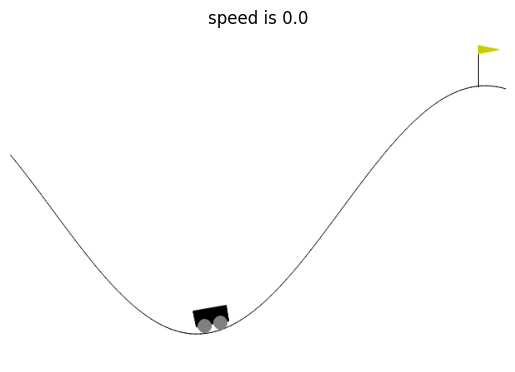

In [6]:
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")
env.reset()
visualize(env)

Observation Space:
The observation is a ndarray with shape (2,) where the elements correspond to the following:

| Num |              Observation             |  Min  |  Max |
|:---:|:------------------------------------:|:-----:|:----:|
|  0  | position of the car along the x-axis |  -1.2 |  0.6 |
|  1  | velocity of the car                  | -0.07 | 0.07 |

Action Space:
There are 3 discrete deterministic actions:

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

You can play in this env yourself!!!

Try some actions and visulize the env after every 5 action. use env.step(action) function to do actions. print output of some step function. It returns five values :

new_state, reward, is_terminated ,is_truncated ,extra_info

new state after the action, reward for that action in that step, is the game terminated by reaching the goal, is the game finished by reaching 200 episode limit that is the default in this game, and some possible extra info that we don't use.


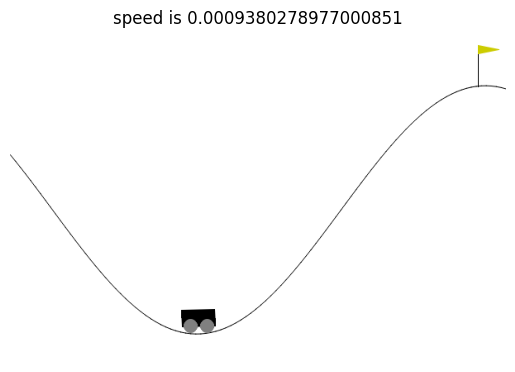

Iteration: 0, Action: 2, New State: [-0.51439697  0.00093803], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 1, Action: 1, New State: [-0.5135279   0.00086902], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 2, Action: 2, New State: [-0.5117344  0.0017935], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 3, Action: 1, New State: [-0.5100299   0.00170454], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 4, Action: 0, New State: [-0.5094271  0.0006028], Reward: -1.0, Terminated: False, Truncated: False


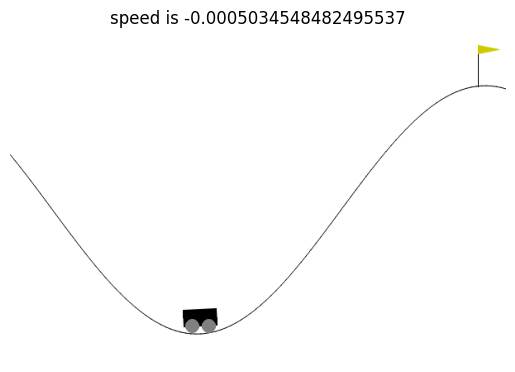

Iteration: 5, Action: 0, New State: [-5.0993055e-01 -5.0345482e-04], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 6, Action: 2, New State: [-5.0953650e-01  3.9406214e-04], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 7, Action: 1, New State: [-5.0924784e-01  2.8862621e-04], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 8, Action: 0, New State: [-0.5100668  -0.00081897], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 9, Action: 2, New State: [-5.0998724e-01  7.9565798e-05], Reward: -1.0, Terminated: False, Truncated: False


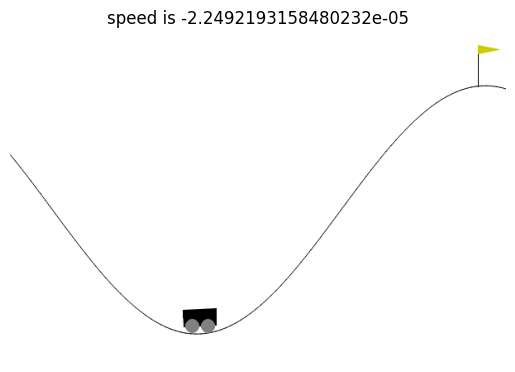

Iteration: 10, Action: 1, New State: [-5.1000977e-01 -2.2492193e-05], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 11, Action: 2, New State: [-0.5091341   0.00087562], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 12, Action: 0, New State: [-5.0936699e-01 -2.3283239e-04], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 13, Action: 0, New State: [-0.5107065  -0.00133954], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 14, Action: 2, New State: [-5.1114273e-01 -4.3620644e-04], Reward: -1.0, Terminated: False, Truncated: False


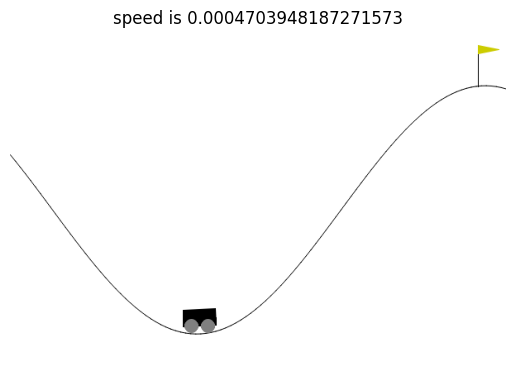

Iteration: 15, Action: 2, New State: [-5.1067233e-01  4.7039482e-04], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 16, Action: 0, New State: [-0.51129884 -0.00062653], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 17, Action: 0, New State: [-0.5130176  -0.00171876], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 18, Action: 1, New State: [-0.5148157 -0.0017981], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 19, Action: 1, New State: [-0.5166797  -0.00186397], Reward: -1.0, Terminated: False, Truncated: False


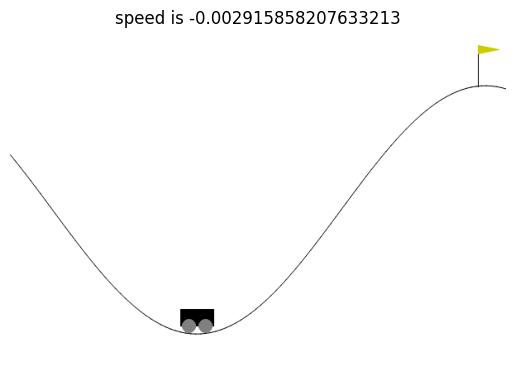

Iteration: 20, Action: 0, New State: [-0.51959556 -0.00291586], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 21, Action: 2, New State: [-0.5215414  -0.00194588], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 22, Action: 1, New State: [-0.5235027  -0.00196131], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 23, Action: 0, New State: [-0.52646476 -0.00296203], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 24, Action: 0, New State: [-0.5304053  -0.00394054], Reward: -1.0, Terminated: False, Truncated: False


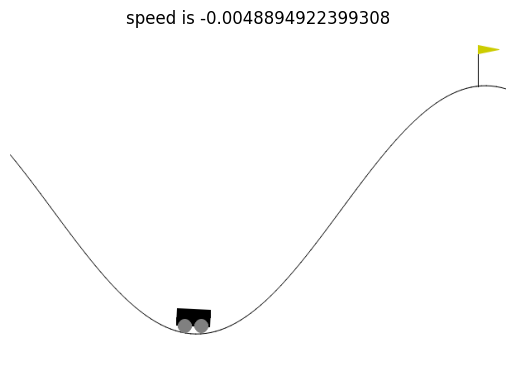

Iteration: 25, Action: 0, New State: [-0.5352948  -0.00488949], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 26, Action: 1, New State: [-0.5400966  -0.00480179], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 27, Action: 2, New State: [-0.54377466 -0.00367811], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 28, Action: 1, New State: [-0.5473016  -0.00352688], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 29, Action: 0, New State: [-0.5516508  -0.00434926], Reward: -1.0, Terminated: False, Truncated: False


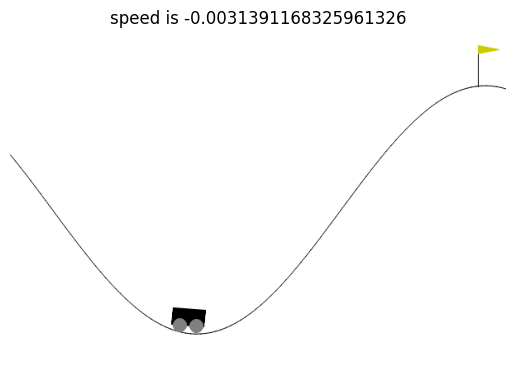

Iteration: 30, Action: 2, New State: [-0.55478996 -0.00313912], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 31, Action: 2, New State: [-0.55669546 -0.00190552], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 32, Action: 0, New State: [-0.5593532  -0.00265771], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 33, Action: 1, New State: [-0.56174326 -0.00239006], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 34, Action: 2, New State: [-0.56284785 -0.0011046 ], Reward: -1.0, Terminated: False, Truncated: False


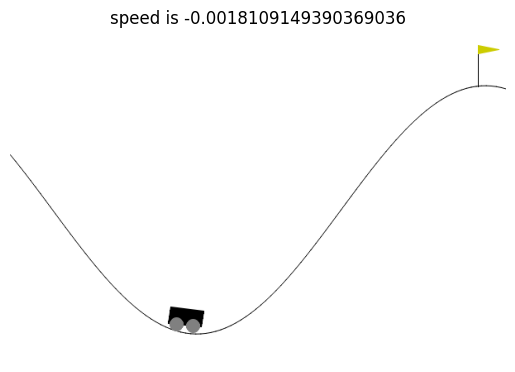

Iteration: 35, Action: 0, New State: [-0.56465876 -0.00181091], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 36, Action: 1, New State: [-0.5661625  -0.00150374], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 37, Action: 1, New State: [-0.5673479  -0.00118538], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 38, Action: 0, New State: [-0.56920606 -0.00185821], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 39, Action: 2, New State: [-5.6972331e-01 -5.1721645e-04], Reward: -1.0, Terminated: False, Truncated: False


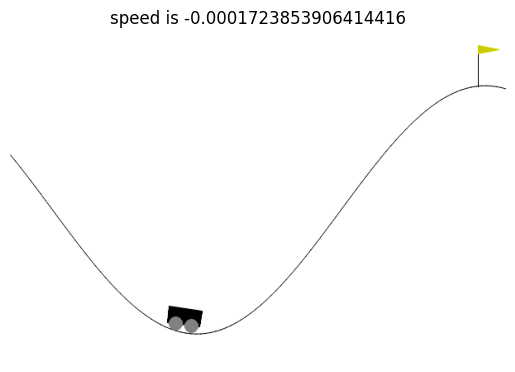

Iteration: 40, Action: 1, New State: [-5.698957e-01 -1.723854e-04], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 41, Action: 0, New State: [-0.570722   -0.00082627], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 42, Action: 1, New State: [-5.7119596e-01 -4.7402599e-04], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 43, Action: 1, New State: [-5.7131428e-01 -1.1825876e-04], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 44, Action: 1, New State: [-5.7107586e-01  2.3838636e-04], Reward: -1.0, Terminated: False, Truncated: False


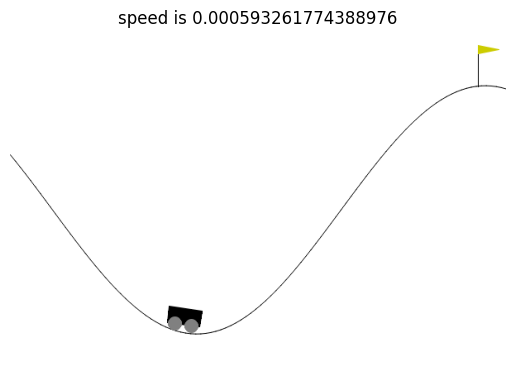

Iteration: 45, Action: 1, New State: [-0.5704826   0.00059326], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 46, Action: 1, New State: [-0.5695389   0.00094373], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 47, Action: 2, New State: [-0.5672517   0.00228719], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 48, Action: 1, New State: [-0.564638    0.00261365], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 49, Action: 2, New State: [-0.56071734  0.00392067], Reward: -1.0, Terminated: False, Truncated: False


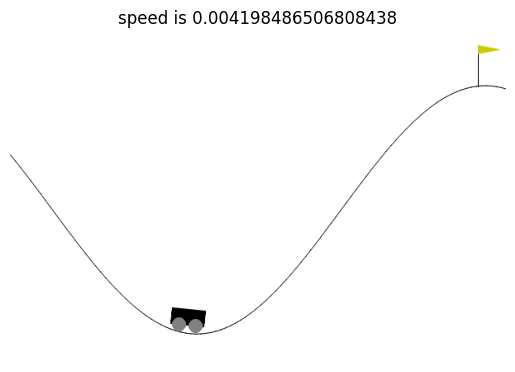

Iteration: 50, Action: 1, New State: [-0.55651885  0.00419849], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 51, Action: 1, New State: [-0.5520739   0.00444499], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 52, Action: 0, New State: [-0.5484156   0.00365829], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 53, Action: 0, New State: [-0.5455713   0.00284424], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 54, Action: 2, New State: [-0.54156244  0.00400892], Reward: -1.0, Terminated: False, Truncated: False


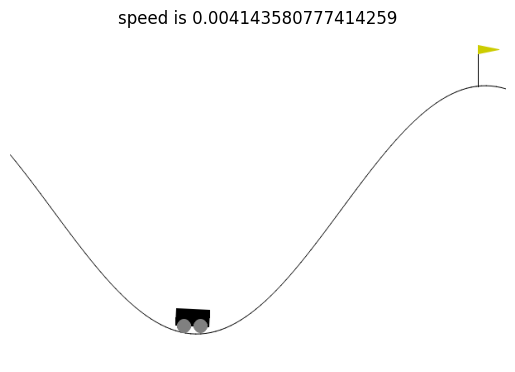

Iteration: 55, Action: 1, New State: [-0.53741884  0.00414358], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 56, Action: 2, New State: [-0.53217167  0.0052472 ], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 57, Action: 2, New State: [-0.52586013  0.00631149], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 58, Action: 0, New State: [-0.5205317   0.00532845], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 59, Action: 0, New State: [-0.51622623  0.00430545], Reward: -1.0, Terminated: False, Truncated: False


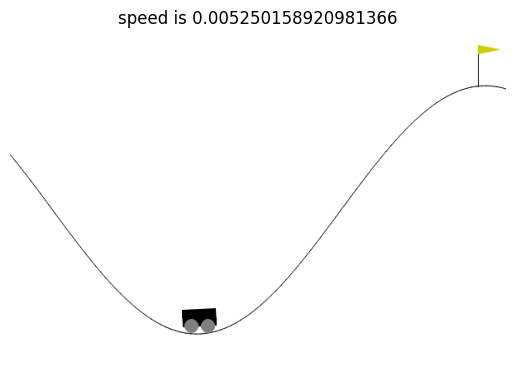

Iteration: 60, Action: 2, New State: [-0.5109761   0.00525016], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 61, Action: 0, New State: [-0.50682056  0.00415551], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 62, Action: 2, New State: [-0.5017908   0.00502973], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 63, Action: 2, New State: [-0.49592456  0.00586629], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 64, Action: 0, New State: [-0.4912656   0.00465897], Reward: -1.0, Terminated: False, Truncated: False


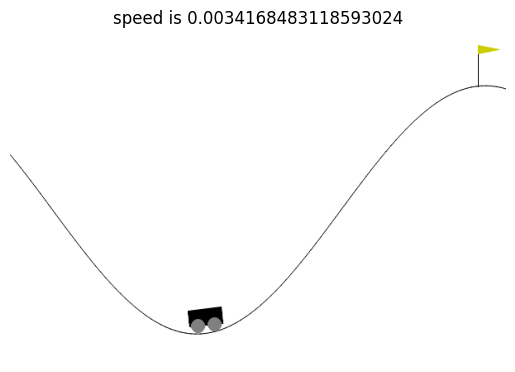

Iteration: 65, Action: 0, New State: [-0.48784876  0.00341685], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 66, Action: 0, New State: [-0.4856995   0.00214924], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 67, Action: 1, New State: [-0.4838339  0.0018656], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 68, Action: 0, New State: [-0.48326585  0.00056807], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 69, Action: 1, New State: [-4.829995e-01  2.663153e-04], Reward: -1.0, Terminated: False, Truncated: False


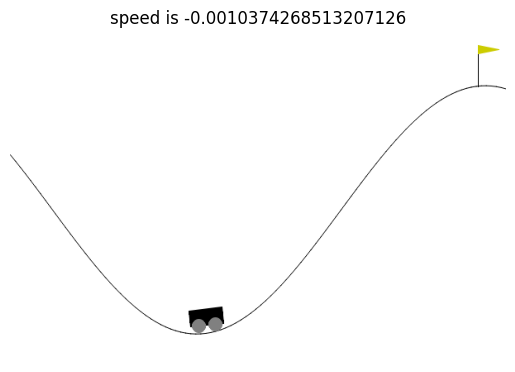

Iteration: 70, Action: 0, New State: [-0.48403695 -0.00103743], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 71, Action: 2, New State: [-4.8437038e-01 -3.3344448e-04], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 72, Action: 0, New State: [-0.48599738 -0.00162698], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 73, Action: 2, New State: [-0.48690575 -0.00090839], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 74, Action: 2, New State: [-4.8708880e-01 -1.8303373e-04], Reward: -1.0, Terminated: False, Truncated: False


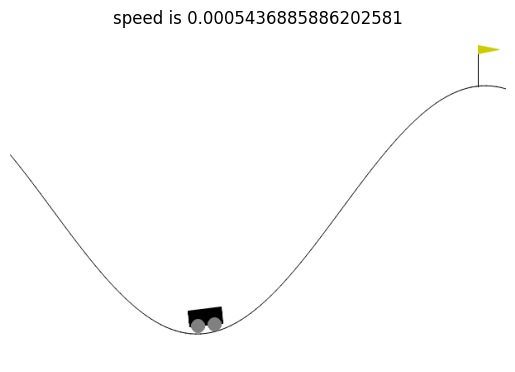

Iteration: 75, Action: 2, New State: [-0.48654512  0.00054369], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 76, Action: 2, New State: [-0.48527876  0.00126636], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 77, Action: 1, New State: [-0.48429915  0.00097959], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 78, Action: 2, New State: [-0.48261362  0.00168553], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 79, Action: 0, New State: [-4.8223472e-01  3.7891101e-04], Reward: -1.0, Terminated: False, Truncated: False


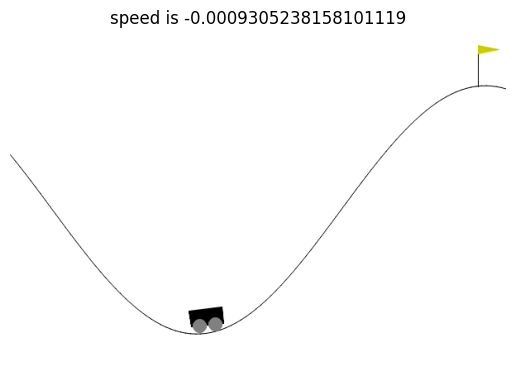

Iteration: 80, Action: 0, New State: [-0.48316523 -0.00093052], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 81, Action: 2, New State: [-4.8339829e-01 -2.3303219e-04], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 82, Action: 2, New State: [-4.829321e-01  4.661944e-04], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 83, Action: 2, New State: [-0.48177013  0.00116195], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 84, Action: 0, New State: [-4.8192108e-01 -1.5094189e-04], Reward: -1.0, Terminated: False, Truncated: False


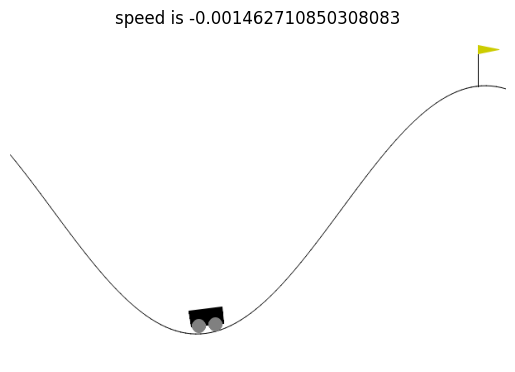

Iteration: 85, Action: 0, New State: [-0.48338377 -0.00146271], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 86, Action: 1, New State: [-0.4851474  -0.00176359], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 87, Action: 1, New State: [-0.4871987  -0.00205134], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 88, Action: 0, New State: [-0.4905225 -0.0033238], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 89, Action: 1, New State: [-0.49409398 -0.00357146], Reward: -1.0, Terminated: False, Truncated: False


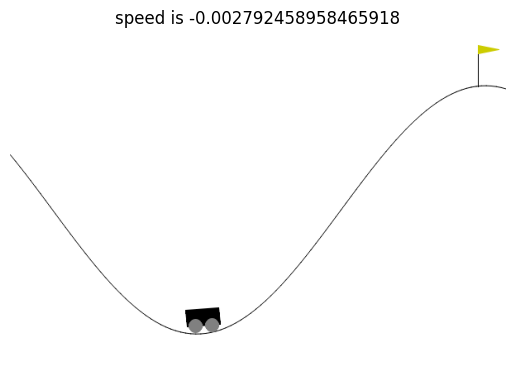

Iteration: 90, Action: 2, New State: [-0.49688643 -0.00279246], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 91, Action: 1, New State: [-0.49987903 -0.00299259], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 92, Action: 2, New State: [-0.5020493  -0.00217034], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 93, Action: 0, New State: [-0.5053812  -0.00333184], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 94, Action: 0, New State: [-0.5098496  -0.00446841], Reward: -1.0, Terminated: False, Truncated: False


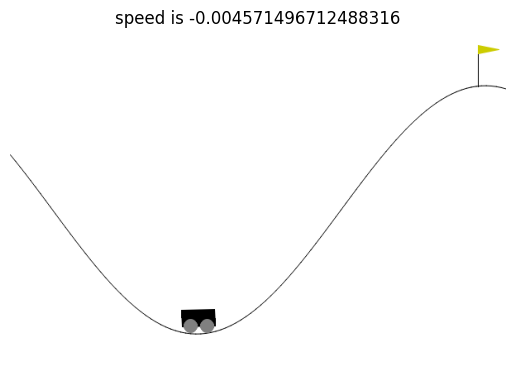

Iteration: 95, Action: 1, New State: [-0.5144211 -0.0045715], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 96, Action: 2, New State: [-0.5180614  -0.00364032], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 97, Action: 0, New State: [-0.5227433  -0.00468185], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 98, Action: 1, New State: [-0.52743155 -0.00468827], Reward: -1.0, Terminated: False, Truncated: False
Iteration: 99, Action: 2, New State: [-0.53109103 -0.00365952], Reward: -1.0, Terminated: False, Truncated: False


(array([-0.58654684,  0.        ], dtype=float32), {})

In [99]:
env.reset() # You can use this function to reset your environment.
######################## YOUR CODE HERE ########################
for i, action in enumerate(np.random.randint(0, env.action_space.n, 100)):
    new_state, reward, is_terminated, is_truncated, extra_info = env.step(action)

    if i % 5 == 0:
        visualize(env)

    print(f"Iteration: {i}, Action: {action}, New State: {new_state}, Reward: {reward}, Terminated: {is_terminated}, Truncated: {is_truncated}")
    
    if is_terminated or is_truncated:
        break

######################## END YOUR CODE #########################
env.reset()

the state consists of two floats.  first one is position in x axis and second one is speed. in the next cell we will write our agent. First we need to convert continuous state to descrete so complete the relevant functions. after that we need to train our agent using Q_learning formula:


$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

After training we use create policy to save your best actions. Then evaluate your policy.

In [163]:
class MountainCarQL:

    def __init__(self, env, discrete_size=20):

        self.discrete_size = discrete_size # number of states we use instead of each continuous argument of state
        self.env = env
        self.q_values = self.create_q_values_list()
        self.policy = {}


        ######################## YOUR CODE HERE ########################
        self.state_space = []

        for i in range(self.env.observation_space.shape[0]):
            self.state_space.append(np.linspace(self.env.observation_space.low[i], self.env.observation_space.high[i], self.discrete_size))

        self.action_space = env.action_space.n
        ######################## END YOUR CODE #########################




    def create_q_values_list(self):
        # initialize q_table and return it
        # use self.discrete_size
        ######################## YOUR CODE HERE ########################
        q_table_shape = tuple([self.discrete_size] * self.env.observation_space.shape[0] + [self.env.action_space.n])

        return np.zeros(q_table_shape)
        ######################## END YOUR CODE #########################



    def get_discrete_state(self, state):
        ######################## YOUR CODE HERE ########################
        # use self.discrete_size
        discrete_state = []

        for i in range(len(state)):
            discrete_state.append(np.digitize(state[i], self.state_space[i]) - 1)

        return tuple(discrete_state)
        ######################## END YOUR CODE #########################



    def learn(self, num_episodes, alpha, gamma, epsilon):
        ######################## YOUR CODE HERE ########################
        for episode in range(num_episodes):
            state = self.env.reset()[0]
            discrete_state = self.get_discrete_state(state)
            done = False

            while not done:
                if np.random.random() < epsilon:
                    action = self.env.action_space.sample()
                else:
                    action = np.argmax(self.q_values[discrete_state])

                new_state, reward, done, _, _ = self.env.step(action)
                new_discrete_state = self.get_discrete_state(new_state)

                if done:
                    self.q_values[discrete_state + (action,)] = reward
                else:
                    max_future_q = np.max(self.q_values[new_discrete_state])
                    current_q = self.q_values[discrete_state + (action,)]
                    new_q = (1 - alpha) * current_q + alpha * (reward + gamma * max_future_q)
                    self.q_values[discrete_state + (action,)] = new_q

                discrete_state = new_discrete_state
            
            if(epsilon > 0.01):
                epsilon *= 0.98
        
        self.create_policy()
        ######################## END YOUR CODE #########################



    def create_policy(self):
        """
        Create your policy in this function after your agent learns the q_values.
        """
        ######################## YOUR CODE HERE ########################
        for i in range(self.discrete_size):
            for j in range(self.discrete_size):
                self.policy[(i, j)] = np.argmax(self.q_values[i, j])
        ######################## END YOUR CODE #########################

    def act(self, visual):
        """
        Move your agent one step according to your policy.
        """
        ######################## YOUR CODE HERE ########################
        state = self.env.reset()[0]
        done = False
        success = 0
        total_reward = 0
        i = 0
        
        while not done:
            if (visual and i % 10 == 0):
                visualize(env)

            discrete_state = self.get_discrete_state(state)
            action = self.policy[discrete_state]
            state, reward, is_terminated, is_truncated, _ = self.env.step(action)
            total_reward += reward
            done = is_terminated or is_truncated
            self.env.render()

            if done and state[0] >= self.env.goal_position:
                    success = 1
            
            i += 1
        
        return success, total_reward
        ######################## END YOUR CODE #########################



    def evaluate(self, num_episodes, visual=False):
        """
        Sample num_episodes episodes from your agent that acts according to your policy.
        Then return the average rewards it gets and percentage of episodes that your car reached the goal.

        Inputs:
            - num_episodes: Number of episodes for sampling.
        Returns:
            tuple: average reward and win percentage
        """
        ######################## YOUR CODE HERE ########################
        total_rewards = 0
        successes = 0
        
        for episode in range(num_episodes):
            success, episode_reward = self.act(visual)

            successes += success
            total_rewards += episode_reward

        avg_reward = total_rewards / num_episodes
        win_percentage = successes / num_episodes * 100

        return avg_reward, win_percentage
        ######################## END YOUR CODE #########################

train your agent with good parameters

In [168]:
EPISODES = 10000
LEARNING_RATE = 0.1
DISCOUNT = 0.99
EPSILON = 0.1
DISCRETE_SIZE = 20


mountain_car_ql = MountainCarQL(env,discrete_size=DISCRETE_SIZE)
mountain_car_ql.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)

evaluate your agent with at least 200 episodes. your average score must be more than -170.


In [169]:
# todo
EPISODES = 200
average_rewards, goal_reached_percentage = mountain_car_ql.evaluate(EPISODES)

print((average_rewards, goal_reached_percentage))

(-140.22, 100.0)


show the path your car took for only one episode. Use visualize function every 10 frame.

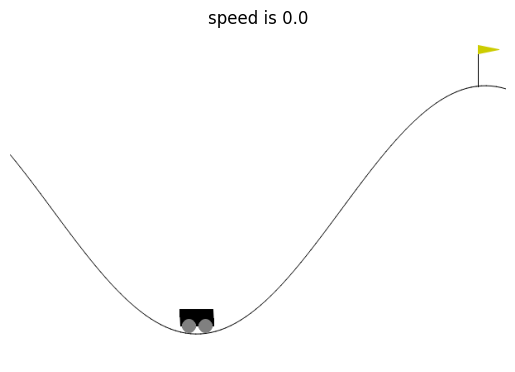

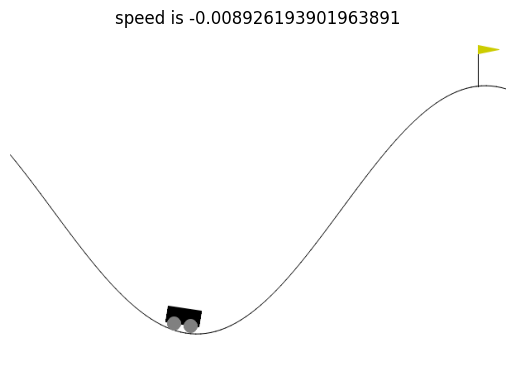

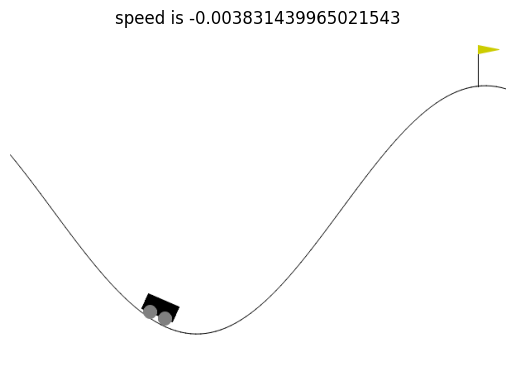

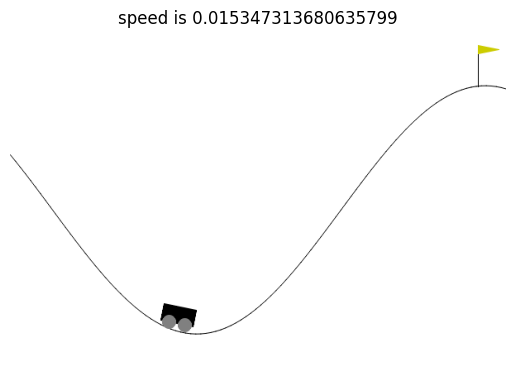

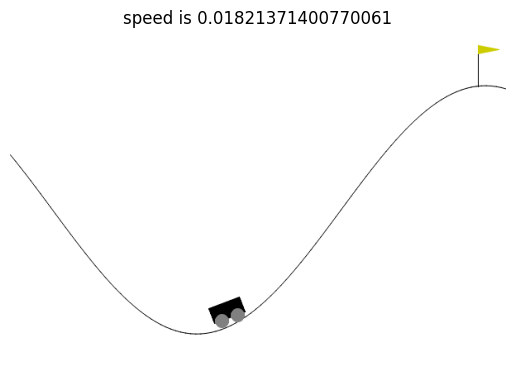

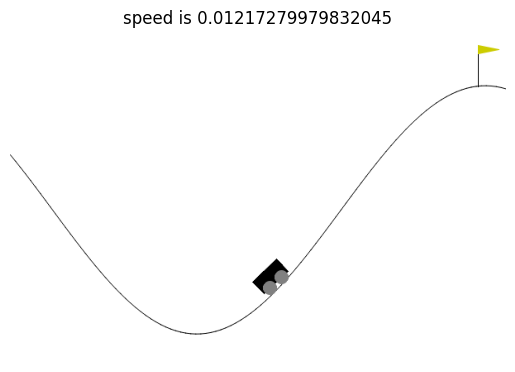

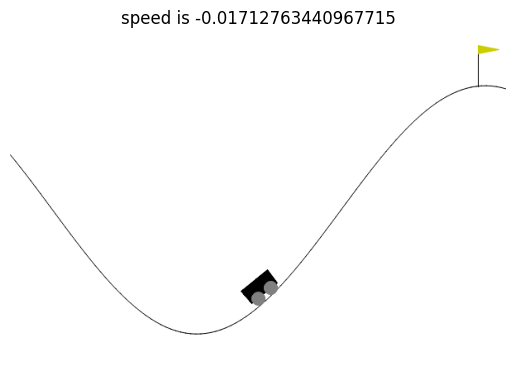

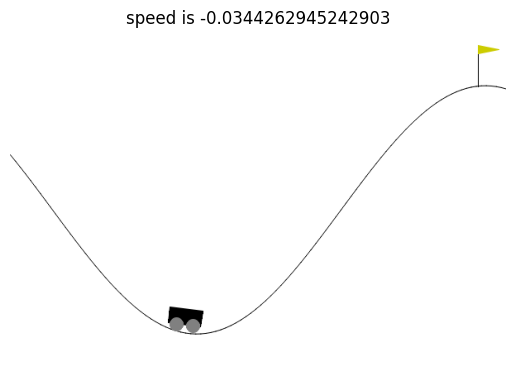

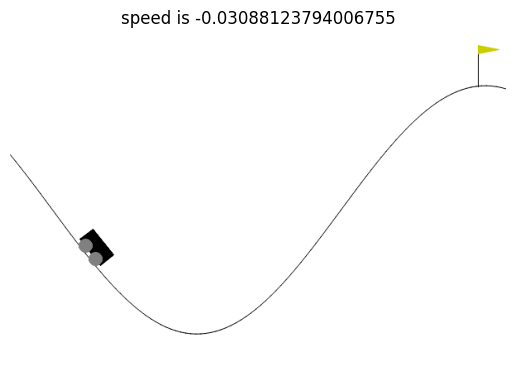

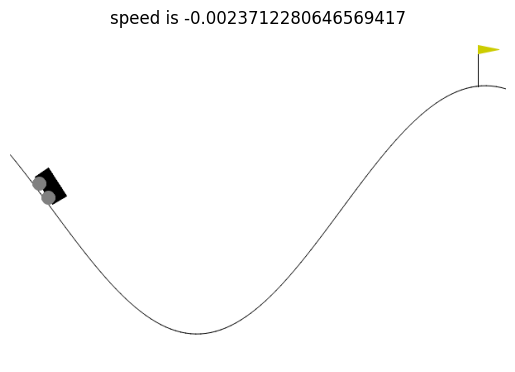

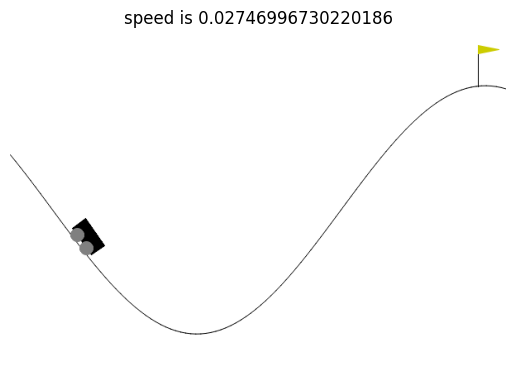

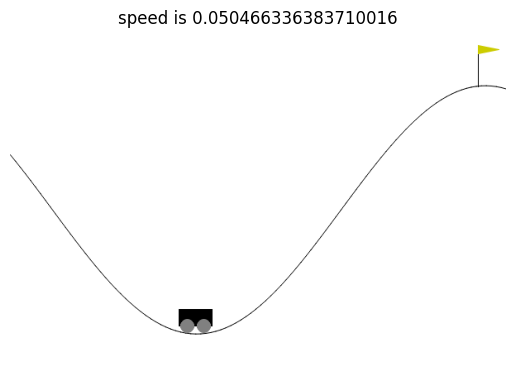

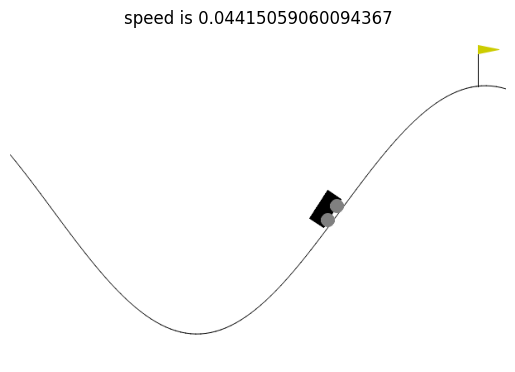

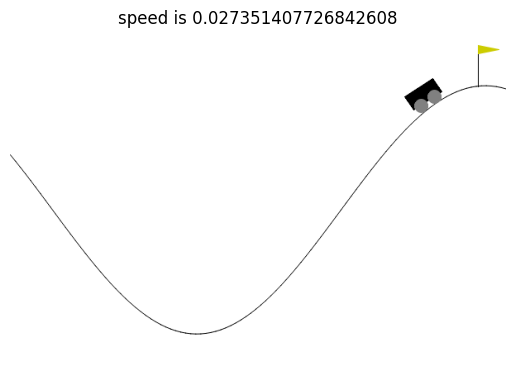

(-138.0, 100.0)


In [170]:
# todo
EPISODES = 1
average_rewards, goal_reached_percentage = mountain_car_ql.evaluate(EPISODES, True)

print((average_rewards, goal_reached_percentage))

## SARSA
now we want to use sarsa algorithm here instead of Q learning. The update rule is:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$

In [181]:
class MountainCarSarsa(MountainCarQL):

    def learn(self, num_episodes, alpha, gamma, epsilon):
    ######################## YOUR CODE HERE ########################
        for episode in range(num_episodes):
            state = self.env.reset()[0]
            discrete_state = self.get_discrete_state(state)
            action = self.choose_action(discrete_state, epsilon)
            done = False

            while not done:
                next_state, reward, done, _, _ = self.env.step(action)
                next_discrete_state = self.get_discrete_state(next_state)
                next_action = self.choose_action(next_discrete_state, epsilon)

                self.q_values[discrete_state + (action,)] += alpha * (reward + gamma * self.q_values[next_discrete_state + (next_action,)] - self.q_values[discrete_state + (action,)])

                discrete_state = next_discrete_state
                action = next_action
                discrete_state = next_discrete_state
            
            if(epsilon > 0.01):
                epsilon *= 0.98
        
        self.create_policy()
    ######################## END YOUR CODE #########################

    def choose_action(self, state, epsilon):
        if np.random.rand() < epsilon:
            return self.env.action_space.sample() 
        else:
            return np.argmax(self.q_values[state])

train your agent with good parameters

In [182]:
EPISODES = 10000
LEARNING_RATE = 0.1
DISCOUNT = 0.99
EPSILON = 0.1
DISCRETE_SIZE = 20

mountain_car_sarsa = MountainCarSarsa(env,discrete_size=DISCRETE_SIZE)
mountain_car_sarsa.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)

evaluate your agent with at list 200 episodes. your average score must be more than -175.

In [184]:
# todo
EPISODES = 200
average_rewards, goal_reached_percentage = mountain_car_sarsa.evaluate(EPISODES)

print((average_rewards, goal_reached_percentage))

(-138.205, 100.0)


show the path your car took for only one episode. Use visualize function every 10 frame.

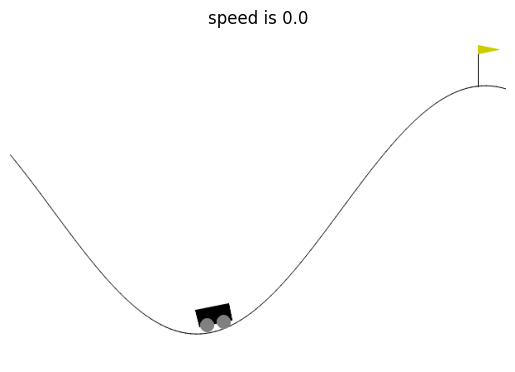

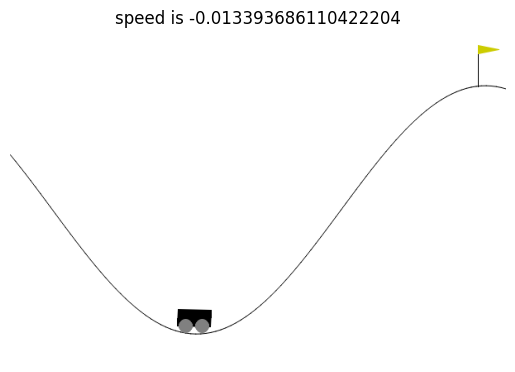

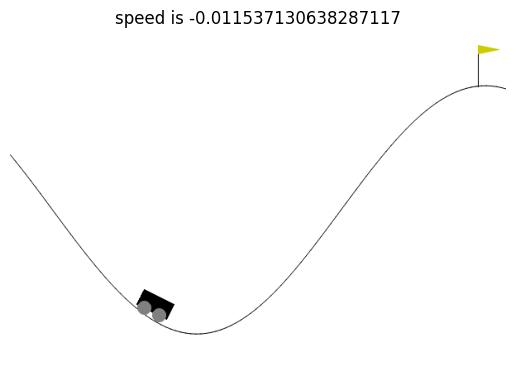

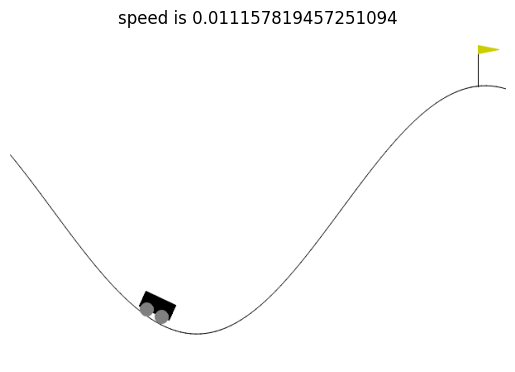

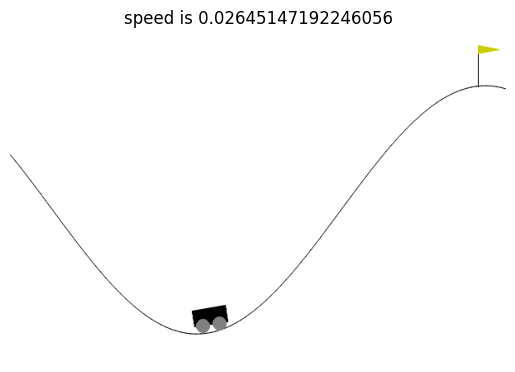

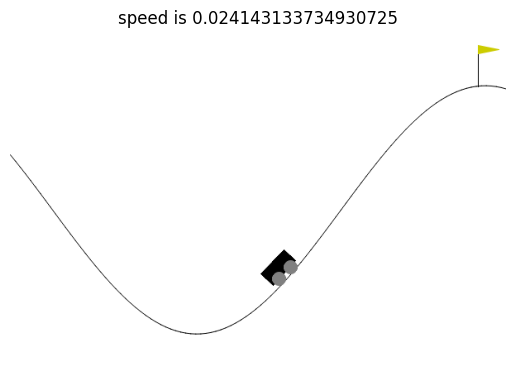

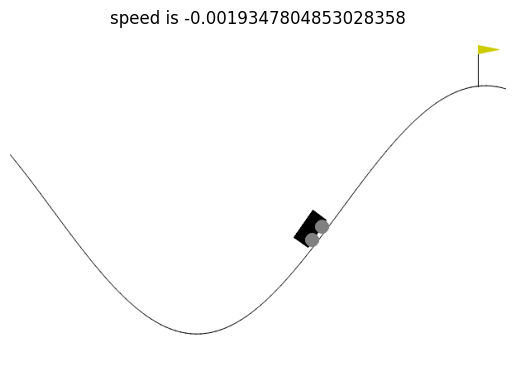

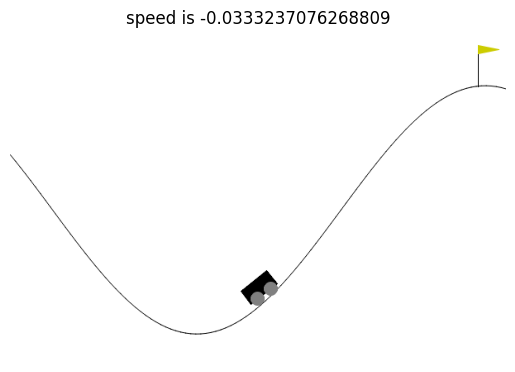

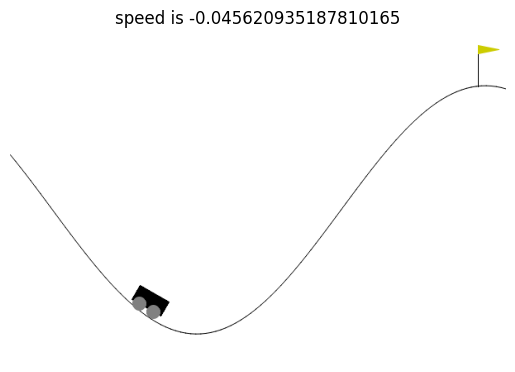

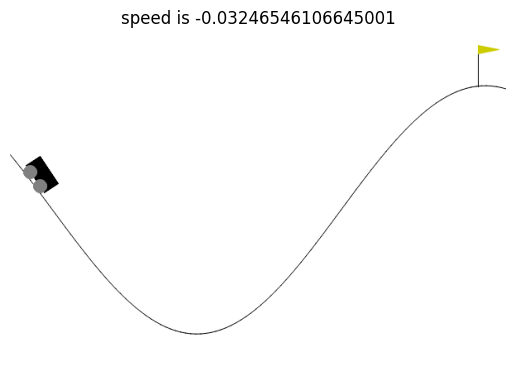

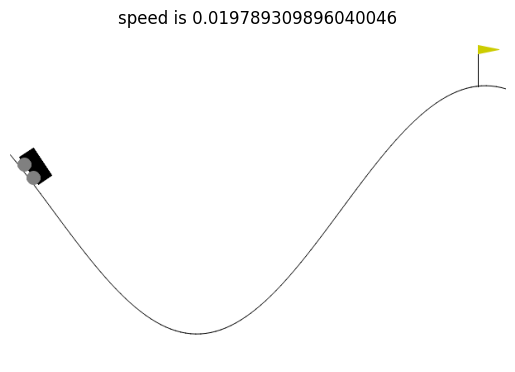

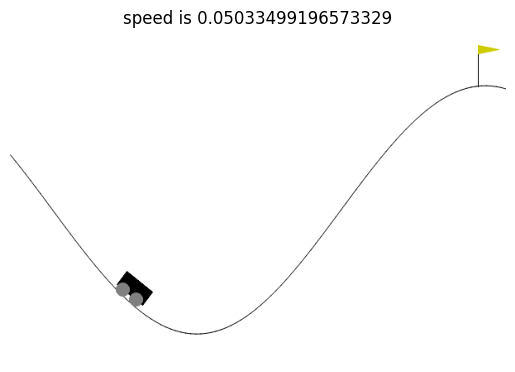

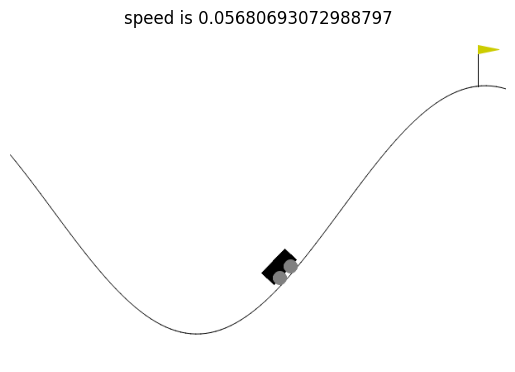

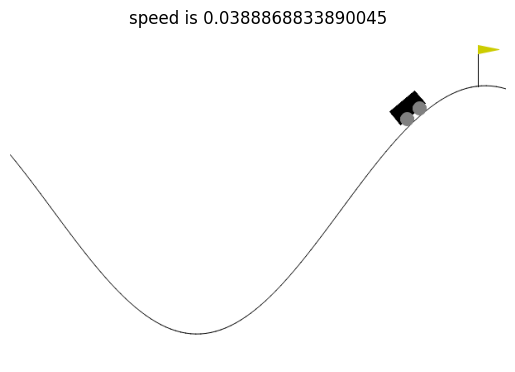

(-137.0, 100.0)


: 

In [187]:
# todo
EPISODES = 1
average_rewards, goal_reached_percentage = mountain_car_sarsa.evaluate(EPISODES, True)

print((average_rewards, goal_reached_percentage))

Is there any difference between the two algorithms? Compare results and explain why.

Answer:
The answer is Yes. Q-learning and SARSA are both reinforcement learning algorithms with distinct differences. Q-learning is an off-policy method that updates Q-values using the maximum possible future reward, promoting aggressive exploration. SARSA, an on-policy method, updates Q-values based on the actual actions taken by the agent, reflecting a more cautious exploration strategy.

In deterministic environments, Q-learning may find the optimal policy faster due to its exploratory nature, but it can be unstable in stochastic or risky environments. Conversely, SARSA's cautious approach often leads to more stable and consistent learning, especially in environments with high variability or risks.

For example, in the Mountain Car environment, Q-learning might initially perform worse due to excessive exploration but could eventually find a good policy. SARSA, however, typically performs more steadily, achieving higher average rewards and success rates due to its balanced exploration-exploitation strategy. Thus, the choice between Q-learning and SARSA depends on the specific characteristics and requirements of the environment.